# Applied Healthcare Analytics

# Lecture : Supervised Learning

Workshop Instructions:

1. Read through the text descriptions at the top of the cell/code blocks
2. Run the code below by selecting the code block and pressing ``Ctrl + Enter``. Note: The preceding code blocks must be run before proceeding to the next block.
2. Think through the guiding questions and points that are raised for the step. What do you observe from the output and what do they mean?

In [1]:
!pip install ydata-profiling
!pip install --upgrade Pillow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [45]:
# import warnings
# warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler

from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', 100)

# Open Source Datasets

The datasets in this notebook can be obtained from the **UCI Machine Learning Repository**

1. Heart Failure Clinical Records Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

**References**:

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
2. Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza: "Survival analysis of heart failure patients: a case study". PLoS ONE 12(7), 0181001 (2017)
3. Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]


# 1. Read in datasets

In [46]:
url = 'https://raw.githubusercontent.com/ISSS623-AHA/ISSS623_2024/refs/heads/main/Lecture%203/heart_failure_clinical_records_dataset.csv'
hf=pd.read_csv(url)

# 2. Data Exploration - Data Formats

The first step in any data analysis process is inspecting the dataset itself and familiarizing with the data format and presentation. Use the `.head()` and `.describe()` methods on the CKD and Heart Failure DataFrames to have a look at the values in the columns and how they are presented.

Key Considerations:

- Are there any missing values? How do you want to treat cases with these values?
- Are there duplicated rows?
- Is the data in a long or wide format?
- Which is your target variable, or variable that you are interesting in predicting?
- Is the dataset balanced i.e. equal proportions of examples from each class label?

### Heart Failure Dataset

In [47]:
hf.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Plotting or visualizating the dataset helps to identify initial trends or distributions that will be useful in the analysis. These variables can be plotted in many forms, each with its own use in different data types: bar chart, line chart, histogram, box plots etc.

Key Considerations:

- Is the target variable balanced across all classes? Are there outliers or inbalanced data?
- Are there any missing data?
- Are there variables with low variance (skewed distributions)? These variables may not be useful as predictors if their variance is too low.
- What distribution does the variable take on? Is it normal, or does it have a bi-model shape?

Try exploring the data with pandas_profiler

In [48]:
profile = ProfileReport(hf,title='Heart Failure',html={'style':{'full_width':True}})
profile.to_file('output_hf.html')
#if using google colab, change to correct path
#profile.to_file('/content/drive/My Drive/output_hf.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 844.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.1 Remove Duplication and Re-formatting Missing Values

Missing values are common in healthcare datasets, where certain entries are missing or are not recorded for various reasons e.g. test was not done. These values can present themselves in the raw dataset in various ways: NA, NIL, ?, None...

You can choose to replace these values with an `NaN` value, which is used by both Pandas and Numpy packages or a string value such as 'NA'. However, note that replacing numeric columns with a string will cause errors and incompatibility fitting these values into machine learning models since it changes the data format and type.

This dataset is fairly clean with no missing values and duplication

In [49]:
# Check and Remove rows that are complete duplicates
hf[hf.duplicated(subset=None)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [50]:
print('Samples with HF = {0}\nSamples with NO HF = {1} '.format(hf[hf['DEATH_EVENT']==1].shape[0],hf[hf['DEATH_EVENT']==0].shape[0]))

Samples with HF = 96
Samples with NO HF = 203 


In [51]:
p = hf[hf['DEATH_EVENT']==1].hist(figsize=(20,20))


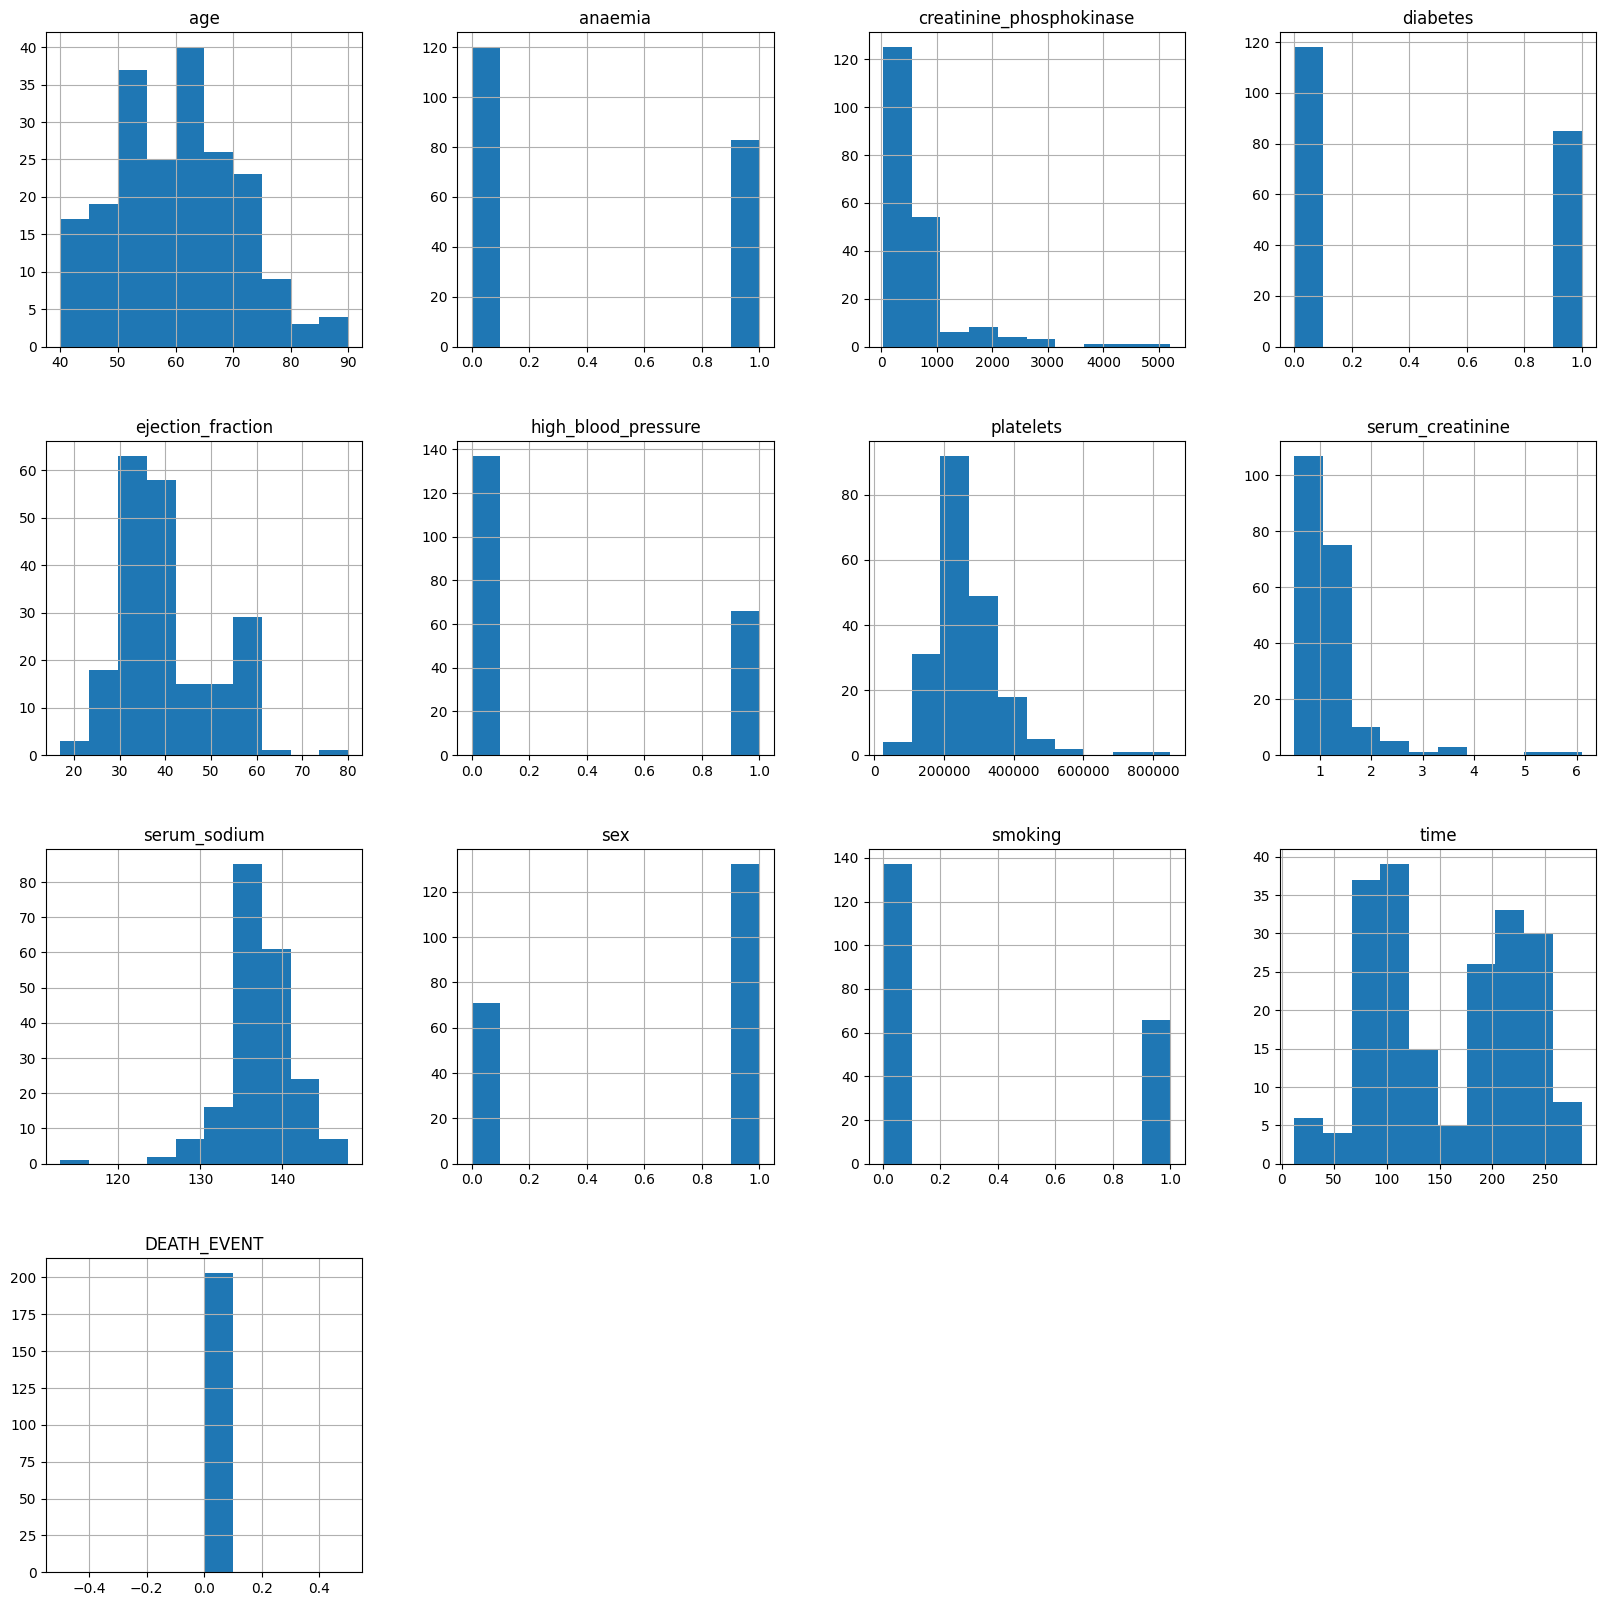

In [7]:
p = hf[hf['DEATH_EVENT']==0].hist(figsize=(20,20))


In [52]:
sns.pairplot(hf, hue='DEATH_EVENT')

## 3. Data Scaling/Standardization
Transforms the features to a standard normal distribution with mean 0 and standard 1

In [53]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [54]:

std_scaler = StandardScaler()

hf[['age','platelets','serum_creatinine','serum_sodium','time']] = std_scaler.fit_transform(hf[['age','platelets','serum_creatinine','serum_sodium','time']])
print('Standard Scaler:\n{}'.format(hf[['age','platelets','serum_creatinine','serum_sodium','time']].describe()))


Standard Scaler:
                age     platelets  serum_creatinine  serum_sodium  \
count  2.990000e+02  2.990000e+02      2.990000e+02  2.990000e+02   
mean   5.703353e-16  7.723291e-17      1.425838e-16 -8.673849e-16   
std    1.001676e+00  1.001676e+00      1.001676e+00  1.001676e+00   
min   -1.754448e+00 -2.440155e+00     -8.655094e-01 -5.363206e+00   
25%   -8.281242e-01 -5.208700e-01     -4.782047e-01 -5.959961e-01   
50%   -7.022315e-02 -1.390846e-02     -2.845524e-01  8.503384e-02   
75%    7.718891e-01  4.111199e-01      5.926150e-03  7.660638e-01   
max    2.877170e+00  6.008180e+00      7.752020e+00  2.582144e+00   

               time  
count  2.990000e+02  
mean  -1.901118e-16  
std    1.001676e+00  
min   -1.629502e+00  
25%   -7.389995e-01  
50%   -1.969543e-01  
75%    9.387595e-01  
max    1.997038e+00  


In [55]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,582,0,20,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7861,0,38,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,146,0,20,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,111,0,20,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,160,1,20,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1


# 4. Data Preparation

Prepare Training and Testing Sets

In this example, the objective is to predict whether a patient with heart failure will survive (0) or not (1) within the follow-up period, given the patient's health status and lab results. The features of the dataset are:

- **age**: age of the patient (years)
- **anaemia**: decrease of red blood cells or hemoglobin (boolean)
- **high blood pressure**: if the patient has hypertension (boolean)
- **creatinine phosphokinase (CPK)**: level of the CPK enzyme in the blood (mcg/L)
- **diabetes**: if the patient has diabetes (boolean)
- **ejection fraction**: percentage of blood leaving the heart at each contraction (percentage)
- **platelets**: platelets in the blood (kiloplatelets/mL)
- **sex**: woman or man (binary)
- **serum creatinine**: level of serum creatinine in the blood (mg/dL)
- **serum sodium**: level of serum sodium in the blood (mEq/L)
- **smoking**: if the patient smokes or not (boolean)
- **time**: follow-up period (days)
- [target] **death event**: if the patient deceased during the follow-up period (boolean)

Once the dataset has been cleaned, transformed and prepared for modelling, the next step is to split them up into different sets for training and testing. This can be done in Python using the `train_test_split` method from the `sklearn.model_selection`.

In a typical data pipeline for model development, only the **training** set is used in the model training phase, while the **testing** set is left aside for evaluating the trained model. This ensures that the **testing** set is unseen by the model, and provides a more unbiased evaluation of the model's performance.


#### Loading all common sklearn packages

In [56]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

In [57]:
X = hf.drop(['DEATH_EVENT','time'],axis=1) # Drop the target variable from the feature dataframe
y = hf['DEATH_EVENT'] # Extract the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 11), (90, 11), (209,), (90,))

In [58]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 30.5 KB


# 5. Supervised Learning

## 5.1 Logistic Regression Model

Logistic Regression models are commonly used in healthcare studies to develop predictive models and to determine important factors related to a particular treatment or condition.

The `LogisticRegression` object below from the `sklearn.linear_model` package can be used to build logistic regression models. However there are also other packages like `statsmodels` which provide more statistical reports that will be useful for interpreting the results.

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr = LogisticRegression() # Create the LogisticRegression model
lr.fit(X_train,y_train) # Fit and train the model on the training dataset
y_predict = lr.predict(X_test) # Observe the prediction output from the model - is it a label or a probability?

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
odds = np.exp(lr.coef_)[0] # Print the odds ratio for the features (converted from the raw coefficients)
for idx,col in enumerate(X.columns):
    print('Odds for %s: %s' %(col,odds[idx]))

Odds for age: 2.2366344014312127
Odds for anaemia: 1.260243010799648
Odds for creatinine_phosphokinase: 1.0002363801757896
Odds for diabetes: 1.3323544208356106
Odds for ejection_fraction: 0.9385932490605514
Odds for high_blood_pressure: 1.8448665830937336
Odds for platelets: 1.0029599088122045
Odds for serum_creatinine: 2.36598390997941
Odds for serum_sodium: 0.8625248854038937
Odds for sex: 0.6282396595122577
Odds for smoking: 1.297996909221026


In [62]:
print('Accuracy of model: %f' % (lr.score(X_test,y_test))) # Test the model on the testing set

Accuracy of model: 0.700000


### 5.1.1 Model Evaluation & Visualization

Once the model has been trained, it should be evaluated on the test set that was earlier set aside and not used in the training process. Here, the model's performance can be evaluated using a few key methods:

1. **Confusion Matrix**: Displays the true labels vs the predicted labels in a 2x2 matrix (for binary outcomes, n by n for multi-class outcomes) and is used to determine overall accuracy, the true positive/negative rates and the false positive/negative rates. Default threshold is 0.5.

2. **ROC Curve**: Plots the true positive rate against the false positive rate. This represents the trade-off between increasing the detection rates at the expense of higher false positives and vice versa.

3. **Precision-Recall Curve**: Plots the recall rates (actual cases detected) against the precision rate (relevant cases). This can be used to represent the trade-off between ensuring more actual cases are detected (higher recall) at the expense of lower proportion of relevant cases (lower precision - more false positives).

Plot each of the plots below using the following code. What do you observe about the trends and shape of the curves?

### Confusion Matrix

In [63]:
# plot_confusion_matrix(lr, X_test, y_test)
%matplotlib inline
cm=confusion_matrix(y_test, y_predict, labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
plt=disp.plot()

### ROC Curve

In [64]:
# plot_roc_curve(lr, X_test, y_test)
RocCurveDisplay.from_estimator(lr, X_test, y_test)

### Precision-Recall Curve

AUPRC can estimated by AP, or average precision.
AP summarizes a precision-recall curve as the weighted mean of precision achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

In [22]:
# plot_precision_recall_curve(lr, X_test, y_test)
y_pred = lr.predict_proba(X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test,y_pred)

### Summary

In [23]:
print("Test Results:")
print(classification_report(y_test, y_predict))

Test Results:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        53
           1       0.81      0.35      0.49        37

    accuracy                           0.70        90
   macro avg       0.74      0.65      0.64        90
weighted avg       0.73      0.70      0.67        90



**Some Insights:**
- The model is significantly better at identifying class 0 than class 1.
- Although the model is precise in predicting class 1 when it does predict class 1, it fails to identify many actual instances of class 1 (low recall).
- Improving recall for class 1 without severely impacting precision could be a focus for model improvement.

## 5.2 Interpreting Logistic Regression Model Output

The `statsmodel` package provides a summary report of the model parameters and coefficients, which are useful for evaluating the important features or variables. Run the code below to train the logistic regression model using the `statsmodels` API and study the summary results. What can you learn from the report?

In [65]:
import statsmodels.api as sm

In [66]:
log_reg = sm.Logit(y_train, X_train).fit(method='bfgs')

         Current function value: 0.453225
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 37


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum

Run the summary and observe the logistic regression results below. Which of the variables are significant to the analysis? What do the odd ratios for those variables indicate?

In [26]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                  0.2384
Time:                        17:32:26   Log-Likelihood:                -94.724
converged:                      False   LL-Null:                       -124.38
Covariance Type:            nonrobust   LLR p-value:                 4.899e-09
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.8061      0.205      3.938      0.000       0.405       1.207
anaemia                      0.2794      0.375      0.745      0.456      -0.456       1.

In [27]:
params = log_reg.params # Retrieve the odds ratio from the model
conf = log_reg.conf_int() # Calculate the 5th and 95th CI
conf['Odds'] = params
conf.columns = ['5%', '95%', 'Odds']
print(np.exp(conf))

                                5%       95%      Odds
age                       1.499172  3.344523  2.239200
anaemia                   0.634056  2.757513  1.322277
creatinine_phosphokinase  0.999897  1.000645  1.000271
diabetes                  0.661906  2.812486  1.364405
ejection_fraction         0.935297  0.977279  0.956057
high_blood_pressure       0.885611  3.920591  1.863362
platelets                 0.620115  1.339998  0.911566
serum_creatinine          1.489173  4.154355  2.487278
serum_sodium              0.587122  1.214687  0.844494
sex                       0.281428  1.411284  0.630218
smoking                   0.638973  3.630361  1.523056


## 5.3 Improving Predictions - Logistic Regression with Grid Search and Hyperparameter Tuning

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
t0 = time.time()
clf = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [100, 10, 1, 0.1, 0.01]
grid = dict(solver=solver, penalty=penalty, C=C)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=clf, cv=cv, param_grid=grid, scoring='accuracy', n_jobs=-1, error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print(f'\nTime taken = {round(time.time() - t0, 2)} sec')

print(f'Best score = {round(grid_result.best_score_, 3)} using params: {grid_result.best_params_}')


Time taken = 9.51 sec
Best score = 0.766 using params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [30]:
final_lr = LogisticRegression(C = 0.1, penalty= 'l2', solver= 'newton-cg') # Create the LogisticRegression model
final_lr.fit(X_train,y_train) # Fit and train the model on the training dataset
y_final_predict = final_lr.predict(X_test) # Observe the prediction output from the model - is it a label or a probability?

In [31]:
coef = np.exp(final_lr.coef_)[0] # Print the odds ratio for the features (converted from the raw coefficients)
for idx,col in enumerate(X.columns):
    print('Odds for %s: %s' %(col,coef[idx]))
print('Accuracy of model: %f' % (final_lr.score(X_test,y_test))) # Test the model on the testing set

Odds for age: 1.7715335655723152
Odds for anaemia: 1.0480501822112016
Odds for creatinine_phosphokinase: 1.0001206960824849
Odds for diabetes: 1.0394578848296205
Odds for ejection_fraction: 0.9349963783473075
Odds for high_blood_pressure: 1.1848062161172188
Odds for platelets: 0.9759811866241207
Odds for serum_creatinine: 1.8526418337555441
Odds for serum_sodium: 0.8921802265296509
Odds for sex: 0.7651010432186632
Odds for smoking: 0.9938052484751166
Accuracy of model: 0.677778


In [32]:
feature_importance=pd.DataFrame(X.columns,columns=['feature'])
feature_importance['importance']=coef

In [33]:
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

In [34]:
ax = feature_importance.plot.barh(x='feature', y='importance')

# 6. Decision Tree

## 6.1 Building a basic decision tree with pre-specified hyperparameter

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)
print(y_predict)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dTree.score(X_test, y_test)))


[1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
Accuracy of decision tree classifier on test set: 0.71


In [40]:
cm=confusion_matrix(y_test, y_predict, labels=dTree.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dTree.classes_)
plt=disp.plot()

In [38]:
# plot_roc_curve(dTree, X_test, y_test)
RocCurveDisplay.from_estimator(dTree, X_test, y_test)

In [39]:
# plot_roc_curve(dTree, X_test, y_test,pos_label=0)
RocCurveDisplay.from_estimator(dTree, X_test, y_test,pos_label=0)

In [41]:

y_pred = dTree.predict_proba(X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test,y_pred)

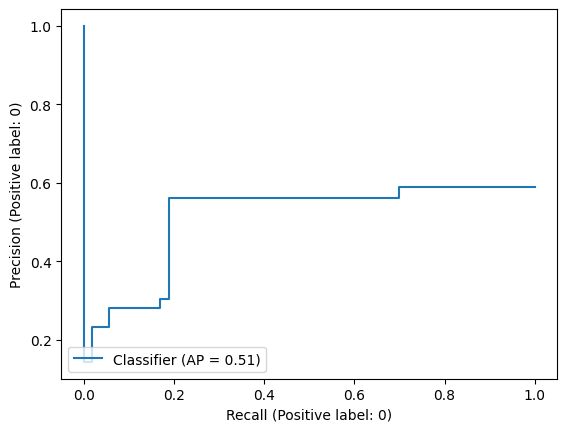

In [41]:
# plot_precision_recall_curve(dTree, X_test, y_test,pos_label=0)
PrecisionRecallDisplay.from_predictions(y_test,y_pred,pos_label=0)

In [42]:
print("Test Results:")
print(classification_report(y_test, y_predict))

Test Results:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        53
           1       0.66      0.62      0.64        37

    accuracy                           0.71        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.71      0.71      0.71        90



# 6.2 Improving the Decision Tree with Hyperparameter Tuning

## Decision Tree with Grid Search, Random Search and Hyperparameter Tuning

### 6.2.1 Repeated Stratified Grid Search

In [44]:
t0 = time.time()
clf=DecisionTreeClassifier()
max_features = ['auto', 'sqrt', 'log2']
class_weight='balanced'
ccp_alpha=[0.1, .01, .001]
max_depth=[3,4, 5, 6, 7, 8, 9]
criterion = ['gini', 'entropy']
grid = dict(max_features=max_features, ccp_alpha=ccp_alpha, max_depth=max_depth,criterion=criterion)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, cv=cv, scoring='accuracy',verbose=True)
grid_search.fit(X_train, y_train)
grid_result = grid_search.fit(X_train, y_train)

print(f'\nTime taken = {round(time.time() - t0, 2)} sec')

print(f'Best score = {round(grid_result.best_score_, 3)} using params: {grid_result.best_params_}')

Fitting 15 folds for each of 126 candidates, totalling 1890 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packa

Fitting 15 folds for each of 126 candidates, totalling 1890 fits

Time taken = 9.09 sec
Best score = 0.777 using params: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packa

### 6.2.1 Randomized Search

In [ ]:
from scipy.stats import randint
param_dist = {"max_depth": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"],
              "class_weight": ['balanced']}
rand_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring='accuracy', n_iter=100, n_jobs=-1, error_score=0)
rand_result = rand_search.fit(X_train, y_train)
print(f'\nTime taken = {round(time.time() - t0, 2)} sec')

print(f'Best score = {round(rand_result.best_score_, 3)} using params: {rand_result.best_params_}')


Time taken = 27.94 sec
Best score = 0.799 using params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}


In [ ]:
y_test_df=y_test.copy()

grid_Tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01, max_depth = 8, max_features = 'log2')
grid_Tree.fit(X_train, y_train)
y_grid_prediction = grid_Tree.predict(X_test)
y_test_df['grid_preds'] = y_grid_prediction

randsearch_Tree = DecisionTreeClassifier(criterion='gini', max_depth= 1, min_samples_leaf= 6)
randsearch_Tree.fit(X_train, y_train)
y_randsearch_prediction = randsearch_Tree.predict(X_test)
y_test_df['randsearch_preds'] = y_randsearch_prediction

dTree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth = 5)
dTree.fit(X_train, y_train)
y_prediction = dTree.predict(X_test)
y_test_df['original_preds'] = y_prediction

X_test_compare=pd.merge(X_test,y_test_df, how='left',left_index=True,right_index=True)

print('Accuracy of decision tree classifier (grid search) on test set: {:.2f}'.format(grid_Tree.score(X_test, y_test)))
print('Accuracy of decision tree classifier (random search) on test set: {:.2f}'.format(randsearch_Tree.score(X_test, y_test)))
print('Accuracy of decision tree classifier (initial parameter) on test set: {:.2f}'.format(dTree.score(X_test, y_test)))
X_test_compare

Accuracy of decision tree classifier (grid search) on test set: 0.67
Accuracy of decision tree classifier (random search) on test set: 0.64
Accuracy of decision tree classifier (initial parameter) on test set: 0.71


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
281,0.771889,0,582,0,40,0,-2.174896e+00,1.264666,-0.141976,1,1,0
265,-0.912335,1,298,0,35,0,1.010256e+00,-0.478205,0.766064,1,1,0
164,-1.333392,0,2442,1,30,0,7.234901e-01,-0.284552,0.539054,1,0,1
9,1.614001,1,123,0,35,1,1.276539e+00,7.752020,-0.823006,1,1,1
77,-1.586025,0,102,1,40,0,-2.699496e-01,-0.187726,0.766064,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
132,-1.249180,0,719,0,40,1,7.535660e-09,-0.207091,0.085034,0,0,0
72,2.035057,0,5882,0,35,0,-2.084997e-01,-0.381379,-1.050016,1,1,1
15,1.782424,1,379,0,50,0,-2.215863e+00,-0.090900,-0.141976,1,0,1
10,1.192945,1,81,0,38,1,1.071706e+00,2.523407,-1.277026,1,1,1


In [ ]:
print("Test Results:")
print(classification_report(y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        53
           1       0.66      0.62      0.64        37

    accuracy                           0.71        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.71      0.71      0.71        90



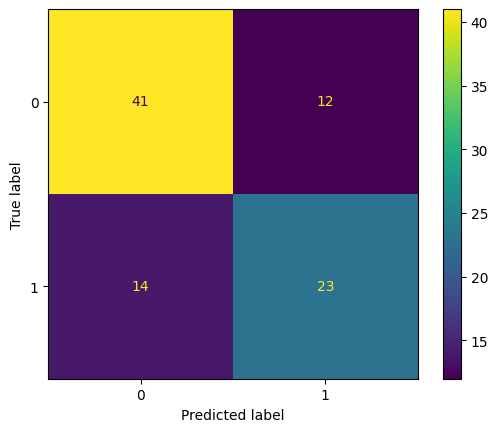

In [ ]:
cm=confusion_matrix(y_test, y_prediction, labels=dTree.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dTree.classes_)
plt=disp.plot()

## 6.3 Improving Predictions with Ensemble Classifiers

## 6.3.1 Bagging Classifiers

### Bagging Classifiers - Ensemble Classifiers
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [43]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [ ]:
t0 = time.time()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
n_estimators = [100, 200, 300, 400, 500]
oob_score = [True, False]
grid = dict(n_estimators=n_estimators, oob_score=oob_score)
clf = BaggingClassifier()

rand_search = RandomizedSearchCV(estimator=clf, cv=cv, param_distributions=grid, scoring='accuracy', n_iter=10, n_jobs=-1, error_score=0)
rand_result = rand_search.fit(X_train, y_train)

print(f'\nTime taken = {round(time.time() - t0, 2)} sec')
print(f'Best score = {rand_result.best_score_} using params: {rand_result.best_params_}')


Time taken = 107.54 sec
Best score = 0.7657375145180024 using params: {'oob_score': True, 'n_estimators': 100}


### Random Forest (Intelligent Bagging)

In [ ]:
t0 = time.time()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
n_estimators = [100, 200, 300, 400, 500]
max_depth=randint(1, 9)
oob_score = [True, False]
grid = dict(n_estimators=n_estimators, oob_score=oob_score, max_depth=max_depth)
clf = RandomForestClassifier()

rand_search = RandomizedSearchCV(estimator=clf, cv=cv, param_distributions=grid, scoring='accuracy', n_jobs=-1)
rand_result = rand_search.fit(X_train, y_train)

print(f'\nTime taken = {round(time.time() - t0, 2)} sec')
print(f'Best score = {rand_result.best_score_} using params: {rand_result.best_params_}')



Time taken = 74.18 sec
Best score = 0.7849787069299264 using params: {'max_depth': 7, 'n_estimators': 400, 'oob_score': True}


In [ ]:
rf_Tree = RandomForestClassifier(n_estimators=400, max_depth = 5,oob_score=True)
rf_Tree.fit(X_train, y_train)
y_prediction = rf_Tree.predict(X_test)

print("Test Results:")
print(classification_report(y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        53
           1       0.68      0.35      0.46        37

    accuracy                           0.67        90
   macro avg       0.67      0.62      0.61        90
weighted avg       0.67      0.67      0.64        90



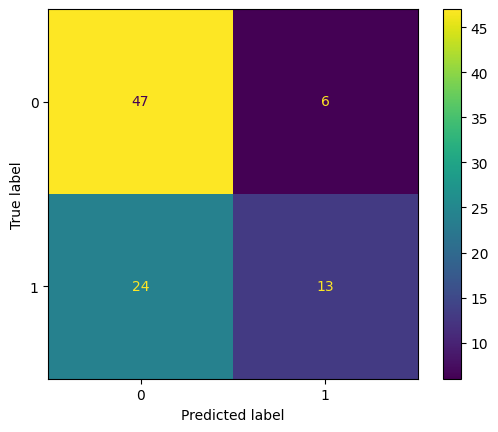

In [ ]:
cm=confusion_matrix(y_test, y_prediction, labels=rf_Tree.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_Tree.classes_)
plt=disp.plot()

## 6.3.2 Boosting Classifiers

### Boosting Classifiers - XG Boost (Note: Takes 10 mins to run)


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
n_estimators = np.arange(100, 1300, 100)
learning_rate = [0.01, 0.11, 0.01]
subsample = np.arange(0.1, 1.1, 0.1)
max_depth = np.arange(2, 15, 1)
# oob_score = [True, False]

grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=max_depth)
clf = GradientBoostingClassifier()
rand_search= RandomizedSearchCV(estimator=clf, cv=cv, param_distributions=grid, scoring='accuracy', n_iter=100, n_jobs=-1, error_score=0)
xgb_result=rand_search.fit(X_train, y_train)
# hp_tune(x=x_train, y=y_train, clf=clf, grid=grid)
print(f'Best score = {xgb_result.best_score_} using params: {xgb_result.best_params_}')

Best score = 0.7800232288037166 using params: {'subsample': 0.2, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.01}


In [ ]:
xgb_Tree = GradientBoostingClassifier(subsample=0.2, n_estimators=200, max_depth = 11,learning_rate=0.01)
xgb_Tree.fit(X_train, y_train)
y_prediction = xgb_Tree.predict(X_test)

print("Test Results:")
print(classification_report(y_test, y_prediction))

Test Results:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        53
           1       0.68      0.41      0.51        37

    accuracy                           0.68        90
   macro avg       0.68      0.64      0.63        90
weighted avg       0.68      0.68      0.66        90



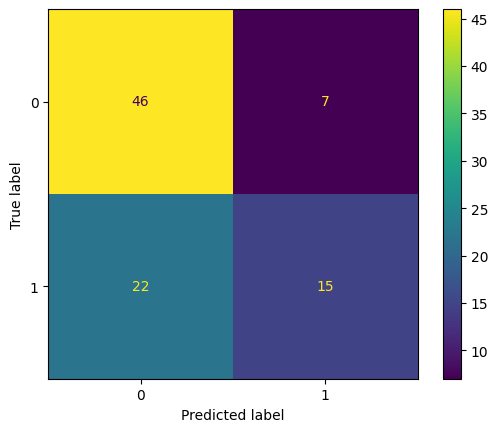

In [ ]:
cm=confusion_matrix(y_test, y_prediction, labels=xgb_Tree.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_Tree.classes_)
plt=disp.plot()